<a href="https://colab.research.google.com/github/TasfiaTahsinAnnita/CSE475Labtasks/blob/main/DatasetF_Labtask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


#These are popular ensemble methods used for classification (RandomForestClassifier, GradientBoostingClassifier)
#This is an ensemble model that combines multiple classifiers to
#improve prediction accuracy (VotingClassifier)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

#A simple and widely used
#linear classifier, commonly used as a baseline in classification tasks.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#Used to standardize features by removing the mean and
#scaling to unit variance, which improves model performance(StandardScaler)

#Used to transform categorical data into a numerical format by encoding
#categorical variables as binary (one-hot) vectors(OneHotEncoder)

from sklearn.preprocessing import StandardScaler, OneHotEncoder

#A powerful tool for transforming specific columns in a dataframe,
#often used to apply different preprocessing steps to numerical
#and categorical columns.
from sklearn.compose import ColumnTransformer

df = pd.read_csv('/content/drive/MyDrive/CSE475/cw_22_23_24.csv')
#df = df.sample(frac=0.1, random_state=42)  # Use only 10% of data for testing

df.head()

X = df.drop(['status','pt_name','consultant'], axis=1)
print(X)
#This operation reduces each class label by 1, assuming
#class labels originally start from 1. If classes were
#initially numbered as 1, 2, 3, etc., they’ll now be 0, 1, 2, etc.



#Many machine learning algorithms in Python
#(especially in libraries like scikit-learn)
#expect class labels to start from 0. This
#adjustment simplifies compatibility with
#these algorithms and avoids indexing issues.
# y = df['loan_status']-1
y = df['status']

#Identifying Feature Types:

# Split the features into categorical and numerical

#Selects the columns containing categorical data
categorical_features = X.select_dtypes(include=['object']).columns

#Selects columns containing numerical data
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns


#Data Preprocessing:

# Standard scaling for numerical features only

#will adjust the data so that each feature has
#a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()

#first learns the mean and standard deviation for
#each numerical feature in X.
#This helps ensure that all numerical features are on a similar scale.

#this process centers the data around zero and adjusts the scale,
#which often improves the performance of machine learning models
#by preventing any one feature from dominating due to its larger scale.
scaled_numerical_data = scaler.fit_transform(X[numerical_features])

# One-hot encoding for categorical features only

#The OneHotEncoder converts categorical variables
#into binary (one-hot) encoded variables.
encoder = OneHotEncoder(drop='first')
encoded_categorical_data = encoder.fit_transform(X[categorical_features])

# Concatenate the scaled numerical and encoded categorical data

#Concatenates the scaled numerical and encoded categorical arrays horizontally,
#combining them into a single dataset.
processed_data = np.hstack([scaled_numerical_data, encoded_categorical_data.toarray()])

# Convert to DataFrame with appropriate column names
final_columns = numerical_features.tolist() + encoder.get_feature_names_out(categorical_features).tolist()
final_df = pd.DataFrame(processed_data, columns=final_columns)

#Stores the preprocessed features in data_X for modeling
data_X = final_df.copy()


        adm_type shift_from  ssc  yr_nae  m_no       mrn sex disease  \
0     Shift From         ER   No       1     1  21845698   F   STEMI   
1     Shift From         ER   No       2     2  22000071   M    ADHF   
2     Shift From         ER   No       3     3  21838760   M     ihd   
3     Shift From         ER   No       4     4  22000251   F     NaN   
4     Shift From        Neu   No       5     5  21825110   F     NaN   
...          ...        ...  ...     ...   ...       ...  ..     ...   
9568  Shift From         ER  yes    1969   323   7051191   F     PPM   
9569  Shift From         ER  yes    1970   324   7049012   F     CAD   
9570  Shift From         ER  yes    1971   325   7049737   M      MI   
9571  Shift From         ER  yes    1972   326   7044907   M    PPCI   
9572  Shift From  Post Cath  yes    1973   327   7047427   F    AWMI   

          D.O.A      D.O.D  L.O.S  
0      1-Jan-22   1-Jan-22      0  
1      1-Jan-22   5-Jan-22      4  
2      1-Jan-22  10-Jan-22 

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (7658, 12277)
Testing set shape: (1915, 12277)


In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest Classifier Performance:")
print(classification_report(y_test, rf_predictions))


Random Forest Classifier Performance:
              precision    recall  f1-score   support

         DOW       0.00      0.00      0.00         8
   Discharge       0.90      1.00      0.95      1722
      Expire       1.00      0.01      0.02       107
        LAMA       0.00      0.00      0.00        37
     Shifted       0.00      0.00      0.00        41

    accuracy                           0.90      1915
   macro avg       0.38      0.20      0.19      1915
weighted avg       0.86      0.90      0.85      1915



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Evaluate Gradient Boosting performance
print("Gradient Boosting Classifier Performance:")
print(classification_report(y_test, gb_predictions))


Gradient Boosting Classifier Performance:
              precision    recall  f1-score   support

         DOW       0.00      0.00      0.00         8
   Discharge       0.90      1.00      0.95      1722
      Expire       0.00      0.00      0.00       107
        LAMA       0.00      0.00      0.00        37
     Shifted       0.00      0.00      0.00        41

    accuracy                           0.90      1915
   macro avg       0.18      0.20      0.19      1915
weighted avg       0.81      0.90      0.85      1915



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions on the test data
stacking_predictions = stacking_model.predict(X_test)

# Evaluate the stacking model's performance
print("Stacking Model Performance:")
print(classification_report(y_test, stacking_predictions))


Stacking Model Performance:
              precision    recall  f1-score   support

         DOW       0.00      0.00      0.00         8
   Discharge       0.90      1.00      0.95      1722
      Expire       0.50      0.01      0.02       107
        LAMA       0.00      0.00      0.00        37
     Shifted       0.00      0.00      0.00        41

    accuracy                           0.90      1915
   macro avg       0.28      0.20      0.19      1915
weighted avg       0.84      0.90      0.85      1915



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Voting Classifier (with hard voting)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ],
    voting='hard'
)

voting_clf.fit(X_train, y_train)
voting_predictions = voting_clf.predict(X_test)

# Evaluate Voting Classifier performance
print("Voting Classifier Performance (Hard Voting):")
print(classification_report(y_test, voting_predictions))


Voting Classifier Performance (Hard Voting):
              precision    recall  f1-score   support

         DOW       0.00      0.00      0.00         8
   Discharge       0.90      1.00      0.95      1722
      Expire       1.00      0.01      0.02       107
        LAMA       0.00      0.00      0.00        37
     Shifted       0.00      0.00      0.00        41

    accuracy                           0.90      1915
   macro avg       0.38      0.20      0.19      1915
weighted avg       0.86      0.90      0.85      1915



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Compare accuracy across models
models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Voting Classifier': voting_clf
}

for model_name, model in models.items():
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy:.4f}")


Random Forest Accuracy: 0.8992
Gradient Boosting Accuracy: 0.8966
Voting Classifier Accuracy: 0.8997


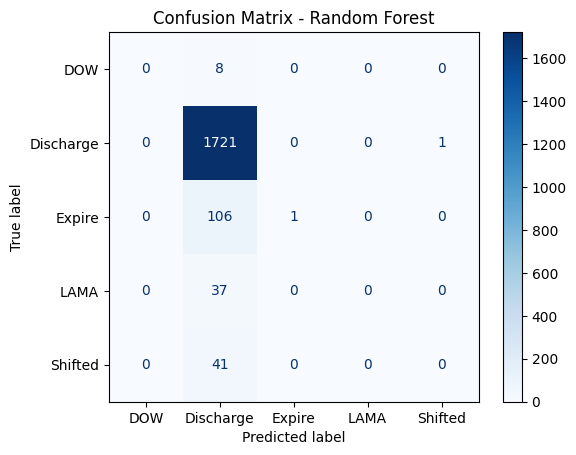

In [ ]:
# Plot confusion matrix for the best-performing model
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Function to perform cross-validation
def evaluate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")
    return scores


In [ ]:
# Random Forest (Bagging)
print("Random Forest (Bagging) Cross-Validation:")
rf_cv_scores = evaluate_model(RandomForestClassifier(n_estimators=50, random_state=42), data_X, y)

# Gradient Boosting (Boosting)
print("\nGradient Boosting (Boosting) Cross-Validation:")
gb_cv_scores = evaluate_model(GradientBoostingClassifier(n_estimators=50, random_state=42), data_X, y)

# Voting Classifier
print("\nVoting Classifier Cross-Validation:")
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ],
    voting='hard'
)
voting_cv_scores = evaluate_model(voting_clf, data_X, y)

# Stacking Classifier
print("\nStacking Classifier Cross-Validation:")
stacking_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5
)
stacking_cv_scores = evaluate_model(stacking_model, data_X, y)


Random Forest (Bagging) Cross-Validation:
Cross-Validation Scores: [0.89765013 0.89556136 0.89765013 0.88140021 0.88192268]
Mean Accuracy: 0.8908
Standard Deviation: 0.0075

Gradient Boosting (Boosting) Cross-Validation:
Cross-Validation Scores: [0.84751958 0.86318538 0.86684073 0.84326019 0.86415883]
Mean Accuracy: 0.8570
Standard Deviation: 0.0096

Voting Classifier Cross-Validation:
Cross-Validation Scores: [0.89817232 0.89869452 0.89765013 0.88975967 0.8892372 ]
Mean Accuracy: 0.8947
Standard Deviation: 0.0043

Stacking Classifier Cross-Validation:


In [ ]:
# Create a comparison table
cv_results = {
    "Model": ["Random Forest", "Gradient Boosting", "Voting Classifier", "Stacking Classifier"],
    "Mean Accuracy": [
        rf_cv_scores.mean(),
        gb_cv_scores.mean(),
        voting_cv_scores.mean(),
        stacking_cv_scores.mean()
    ],
    "Std Deviation": [
        rf_cv_scores.std(),
        gb_cv_scores.std(),
        voting_cv_scores.std(),
        stacking_cv_scores.std()
    ]
}

# Convert to DataFrame for easy display
cv_df = pd.DataFrame(cv_results)
print(cv_df)


In [ ]:
!pip install shap

In [ ]:
import shap

# Select the best-performing model (example: Gradient Boosting)
best_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
best_model.fit(X_train, y_train)

# Initialize SHAP Explainer
explainer = shap.Explainer(best_model, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Visualize feature importance (summary plot)
shap.summary_plot(shap_values, X_test)

# Visualize a single prediction (force plot for a specific instance)
sample_idx = 0  # Change this index to analyze different instances
shap.force_plot(explainer.expected_value[1], shap_values[sample_idx].values, X_test.iloc[sample_idx])


In [ ]:
!pip install lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME Explainer
lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=best_model.classes_,
    mode='classification'
)

# Choose a test instance to explain
test_instance = X_test.iloc[0].values.reshape(1, -1)

# Generate explanation for the chosen instance
lime_exp = lime_explainer.explain_instance(
    data_row=test_instance[0],
    predict_fn=best_model.predict_proba
)

# Visualize the explanation
lime_exp.show_in_notebook()
lime_exp.as_list()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Function to evaluate the model and print metrics
def evaluate_model_performance(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    return accuracy, classification_report(y_test, predictions, output_dict=True)

# Random Forest (Bagging)
print("Random Forest (Bagging):")
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_accuracy, rf_report = evaluate_model_performance(rf, X_train, X_test, y_train, y_test)

# Gradient Boosting (Boosting)
print("\nGradient Boosting (Boosting):")
gb = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_accuracy, gb_report = evaluate_model_performance(gb, X_train, X_test, y_train, y_test)

# Voting Classifier
print("\nVoting Classifier:")
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ],
    voting='hard'
)
voting_accuracy, voting_report = evaluate_model_performance(voting_clf, X_train, X_test, y_train, y_test)

# Stacking Classifier
print("\nStacking Classifier:")
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5
)
stacking_accuracy, stacking_report = evaluate_model_performance(stacking_clf, X_train, X_test, y_train, y_test)


In [ ]:
# Create a summary of metrics
performance_summary = {
    "Model": ["Random Forest (Bagging)", "Gradient Boosting (Boosting)", "Voting Classifier", "Stacking Classifier"],
    "Accuracy": [rf_accuracy, gb_accuracy, voting_accuracy, stacking_accuracy],
    "Precision (Weighted Avg)": [rf_report['weighted avg']['precision'], gb_report['weighted avg']['precision'],
                                  voting_report['weighted avg']['precision'], stacking_report['weighted avg']['precision']],
    "Recall (Weighted Avg)": [rf_report['weighted avg']['recall'], gb_report['weighted avg']['recall'],
                               voting_report['weighted avg']['recall'], stacking_report['weighted avg']['recall']],
    "F1-Score (Weighted Avg)": [rf_report['weighted avg']['f1-score'], gb_report['weighted avg']['f1-score'],
                                 voting_report['weighted avg']['f1-score'], stacking_report['weighted avg']['f1-score']]
}

# Convert to a DataFrame for visualization
performance_df = pd.DataFrame(performance_summary)
print(performance_df)


In [ ]:
import matplotlib.pyplot as plt

# Plot the performance comparison
performance_df.set_index("Model").plot(kind="bar", figsize=(12, 6))
plt.title("Performance Comparison of Ensemble Methods")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y")
plt.show()
